In [1]:
import sys
import numpy as np
import os

from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import napari
from tifffile import imread
import napatrackmater.bTrackmate as TM

In [2]:
#Trackmate writes an XML file of tracks, we use it as input
xml_path = 'data/save/tracks.xml' 
#Path to Segmentation image for extracting any track information from labels 
SegmentationImage = 'data/save/Seg.tif'
#Path to Raw image to display the tracks on (optional) else set it to None
RawImage = 'data/save/Raw.tif'
savedir = 'data/save/'
MaskImage = 'data/save/Mask.tif'

In [3]:
Seg = imread(SegmentationImage).astype('uint16')
if RawImage is not None:
  ImageName = os.path.basename(os.path.splitext(RawImage)[0])
  Raw = imread(RawImage).astype('float16')
  
else:
  Raw = None   
  ImageName = os.path.basename(os.path.splitext(SegmentationImage)[0]) 
if MaskImage is not None:
    Mask = imread(MaskImage)
else:
    Mask = None
   

In [4]:
all_track_properties, Mask, calibration = TM.import_TM_XML(xml_path, Raw, Seg, Mask)


100%|██████████| 50/50 [00:35<00:00,  1.40it/s]

TrackID 0
Is a Dividing track: True
TrackID 5
Is a Dividing track: True
TrackID 8
Is a Dividing track: True
TrackID 9
Is a Dividing track: True
TrackID 12
Is a Dividing track: False
TrackID 15
Is a Dividing track: True
TrackID 18
Is a Dividing track: False
TrackID 19
Is a Dividing track: False
TrackID 20
Is a Dividing track: True


# Visualize Dividing tracks

[0, 5, 8, 9, 15, 20]


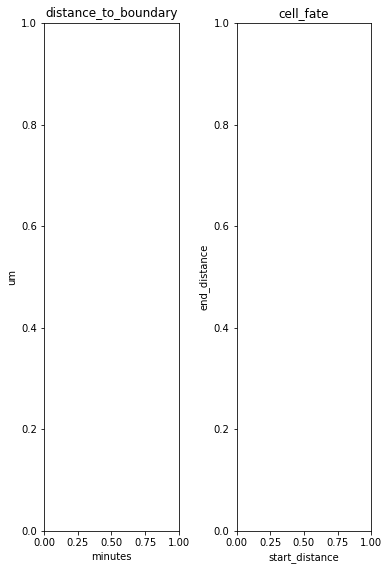

In [6]:
TM.TrackMateLiveTracks(Raw, Seg, Mask,savedir, calibration,  all_track_properties, True)

# Visualize Non Dividing tracks

[12, 18, 19]


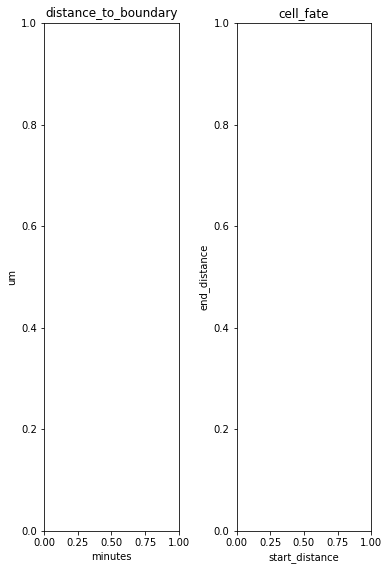

In [5]:
 TM.TrackMateLiveTracks(Raw, Seg, Mask,savedir, calibration, all_track_properties, False)